In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
os.chdir(".")
from parc.data.data import EnergeticMatDataPipeLine as EmData
from parc import misc, metrics, visualization
from parc.model import model_climate
from netCDF4 import Dataset


2023-10-31 21:45:41.461352: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-31 21:45:42.233726: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import pickle


# Data pipeline

In [3]:
data = Dataset('climate_variables_25_43_107_123.nc', 'r', format='NETCDF4')
data.variables.keys()


dict_keys(['longitude', 'latitude', 'time', 'z', 'r', 't', 'u', 'v'])

In [4]:
def read_netcdf4(filename):
    data = Dataset(filename, 'r', format='NETCDF4')
    u = np.float32(np.array(data.variables['u']))
    v = np.float32(np.array(data.variables['v']))
    temp = np.float32(np.array(data.variables['t']))
    geo_poten = np.float32(np.array(data.variables['z']))
    rel_humid = np.float32(np.array(data.variables['r']))

    return u, v, temp, geo_poten, rel_humid

In [5]:
filelist = [
            'climate_variables_25_43_107_123.nc',
#             'climate_variables_25_43_91_107.nc',
#             'climate_variables_25_43_107_123.nc',
#             'climate_variables_34_50_75_91.nc',
#             'climate_variables_34_50_91_107.nc',
           ]

# v_whole = None
# t_whole = None
# z_whole = None
# r_whole = None
idx = 0
for filename in filelist:
    path = filename
    data = read_netcdf4(path)
    if idx == 0:
        u_in = np.float32(data[0][:12000,:64,:64])
        v_in = np.float32(data[1][:12000,:64,:64])
        t_in = np.float32(data[2][:12000,:64,:64])
        z_in = np.float32(data[3][:12000,:64,:64])
        r_in = np.float32(data[4][:12000,:64,:64])
        u_out = np.float32(data[0][1:12001,:64,:64])
        v_out = np.float32(data[1][1:12001,:64,:64])
        t_out = np.float32(data[2][1:12001,:64,:64])
        z_out = np.float32(data[3][1:12001,:64,:64])
        r_out = np.float32(data[4][1:12001,:64,:64])
    else:
        u_in = np.append(u_in,np.float32(data[0][:12000,:64,:64]), axis = 0)
        v_in = np.append(v_in,np.float32(data[1][:12000,:64,:64]), axis = 0)
        t_in = np.append(t_in,np.float32(data[2][:12000,:64,:64]), axis = 0)
        z_in = np.append(z_in,np.float32(data[3][:12000,:64,:64]), axis = 0)
        r_in = np.append(r_in,np.float32(data[4][:12000,:64,:64]), axis = 0)
        u_out = np.append(u_out,np.float32(data[0][1:12001,:64,:64]), axis = 0)
        v_out = np.append(v_out,np.float32(data[1][1:12001,:64,:64]), axis = 0)
        t_out = np.append(t_out,np.float32(data[2][1:12001,:64,:64]), axis = 0)
        z_out = np.append(z_out,np.float32(data[3][1:12001,:64,:64]), axis = 0)
        r_out = np.append(r_out,np.float32(data[4][1:12001,:64,:64]), axis = 0)       
    idx += 1
    

In [21]:
t_in = (t_in - np.amin(t_in))/(np.amax(t_in)-np.amin(t_in))

In [22]:
print(np.amin(t_in), np.amax(t_in))


0.0 1.0


In [ ]:
for i in range(1600, 1616,1):
    plt.imshow(t_in[i,:,:], vmin = 0, vmax = 1)
    plt.show()
    


In [7]:
import cv2 as cv 
import numpy as np
# flow = []
# for i in range (1600,1616,1):
#     flow.append(cv.calcOpticalFlowFarneback(t_in[1600,:,:], t_in[1601,:,:],  
#                                            None, 
#                                            0.5, 3, 8, 3, 10, 1.2, 0))

In [34]:
flow = cv.calcOpticalFlowFarneback(t_in[900,:,:], t_in[901,:,:],  
                                           None, 
                                           0.5, 1,8, 10, 9, 1.5, 0)

In [35]:
np.amin(flow[:,:,1])
np.amax(flow[:,:,1])

1.8185549e-08

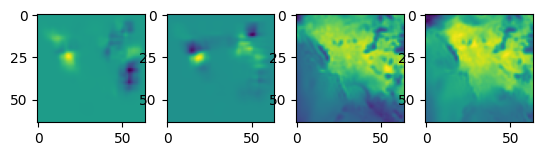

In [36]:
fig, ax = plt.subplots(1,4)
ax[0].imshow(flow[:,:,0])
ax[1].imshow(flow[:,:,1])
ax[2].imshow(t_in[900,:,:])
ax[3].imshow(t_in[901,:,:])

In [ ]:
# The video feed is read in as 
# a VideoCapture object 
# cap = cv.VideoCapture("videoplayback.mp4") 
  
# ret = a boolean return value from 
# getting the frame, first_frame = the 
# first frame in the entire video sequence 
ret, first_frame = cap.read() 
  
# Converts frame to grayscale because we 
# only need the luminance channel for 
# detecting edges - less computationally  
# expensive 
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY) 
  
# Creates an image filled with zero 
# intensities with the same dimensions  
# as the frame 
mask = np.zeros_like(first_frame) 
  
# Sets image saturation to maximum 
mask[..., 1] = 255
  
while(cap.isOpened()): 
      
    # ret = a boolean return value from getting 
    # the frame, frame = the current frame being 
    # projected in the video 
    ret, frame = cap.read() 
      
    # Opens a new window and displays the input 
    # frame 
#     cv.imshow("input", frame) 
      
    # Converts each frame to grayscale - we previously  
    # only converted the first frame to grayscale 
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY) 
      
    # Calculates dense optical flow by Farneback method 

    # Computes the magnitude and angle of the 2D vectors 
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1]) 
      
    # Sets image hue according to the optical flow  
    # direction 
    mask[..., 0] = angle * 180 / np.pi / 2
      
    # Sets image value according to the optical flow 
    # magnitude (normalized) 
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX) 
      
    # Converts HSV to RGB (BGR) color representation 
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR) 
      
    # Opens a new window and displays the output frame 
    cv.imshow("dense optical flow", rgb) 
      
    # Updates previous frame 
    prev_gray = gray 
      
    # Frames are read by intervals of 1 millisecond. The 
    # programs breaks out of the while loop when the 
    # user presses the 'q' key 
    if cv.waitKey(1) & 0xFF == ord('q'): 
        break
  
# The following frees up resources and 
# closes all windows 
cap.release() 
cv.destroyAllWindows() 

In [6]:
vel_seq_in = np.float32(np.stack([u_in,v_in],axis = 3))
vel_seq_out = np.float32(np.stack([u_out,v_out],axis = 3))
state_seq_in = np.float32(np.stack([t_in,z_in,r_in],axis = 3))
state_seq_out = np.float32(np.stack([t_out,z_out,r_out],axis = 3))


In [4]:
# Normalization
def data_normalization(input_data,no_of_channel):
    norm_data = np.zeros(input_data.shape, dtype = np.float32)
    min_val = []
    max_val = []
    for i in range(no_of_channel):
        norm_data[:,:,:,i::no_of_channel] = ((input_data[:,:,:,i::no_of_channel] - np.amin(input_data[:,:,:,i::no_of_channel])) / (np.amax(input_data[:,:,:,i::no_of_channel]) - np.amin(input_data[:,:,:,i::no_of_channel])) + 1E-9)
        min_val.append(np.amin(input_data[:,:,:,i::no_of_channel]))
        max_val.append(np.amax(input_data[:,:,:,i::no_of_channel]))
    return norm_data, min_val, max_val

def data_normalization_test(input_data, min_val, max_val, no_of_channel):
    norm_data = np.zeros(input_data.shape, dtype = np.float32)
    for i in range(no_of_channel):
        norm_data[:,:,:,i::no_of_channel] = ((input_data[:,:,:,i::no_of_channel] - min_val[i]) / (max_val[i] - min_val[i] + 1E-9))
    return norm_data

In [8]:
vel_seq_in_norm, max_vel, min_vel = data_normalization(vel_seq_in, 2)
# vel_seq_in_norm = data_normalization_test(vel_seq_in, max_vel, min_vel, 2)
vel_seq_out_norm = data_normalization_test(vel_seq_out, max_vel, min_vel, 2)

state_seq_in_norm, max_state, min_state = data_normalization(state_seq_in, 3)
# state_seq_in_norm = data_normalization_test(state_seq_in, max_state, min_state, 3)
state_seq_out_norm = data_normalization_test(state_seq_out, max_state, min_state, 3)

In [11]:
value_range = [max_vel, min_vel, max_state, min_state]
with open("value_range", "wb") as fp:   #Pickling
    pickle.dump(value_range, fp)


In [9]:
vel_seq_in.shape
state_seq_in.shape

(60000, 64, 64, 3)

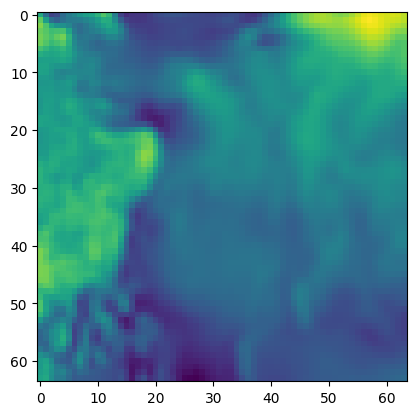

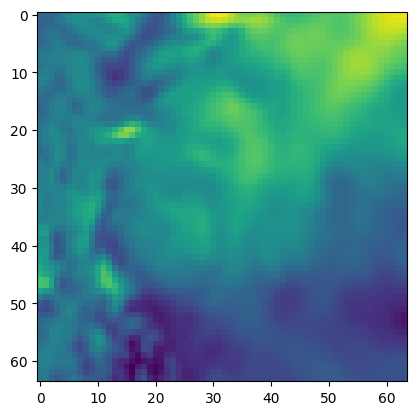

In [10]:
plt.imshow(vel_seq_in[20000,:,:,0])
plt.show()
plt.imshow(vel_seq_out[20000,:,:,0])
plt.show()

# Training


### Stage 1: Differentiator training

In [9]:
tf.keras.backend.clear_session()
mirrored_strategy = tf.distribute.MirroredStrategy()

with mirrored_strategy.scope():
    parc = model_climate.PARCv2(n_state_var = 3, n_time_step = 1, step_size= 1/16, solver = "rk4", mode = "differentiator_training")
    parc.differentiator.load_weights('parc2_diff_rk4_climate_whole_3.h5')
    parc.integrator.trainable = False
    parc.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00005, beta_1 = 0.9, beta_2 = 0.999))

2023-08-10 15:57:53.622332: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-10 15:57:57.292435: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38383 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:0f:00.0, compute capability: 8.0
2023-08-10 15:57:57.298682: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38383 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:4e:00.0, compute capability: 8.0
2023-08-10 15:57:57.302997: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/devi

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task

In [10]:
# Create tf.dataset
dataset_input = tf.data.Dataset.from_tensor_slices((state_seq_in_norm[:,:,:,:],vel_seq_in_norm[:,:,:,:]))
dataset_label = tf.data.Dataset.from_tensor_slices((state_seq_out_norm[:,:,:,:],vel_seq_out_norm[:,:,:,:]))
dataset = tf.data.Dataset.zip((dataset_input, dataset_label))
dataset = dataset.shuffle(buffer_size = 60000) 
dataset = dataset.batch(48)

In [ ]:
parc.fit(dataset, epochs = 10, shuffle = True)

2023-08-10 15:58:28.948181: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:776] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_2"
op: "TensorSliceDataset"
input: "Placeholder/_0"
input: "Placeholder/_1"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_DOUBLE
      type: DT_DOUBLE
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: 60000
  }
}
attr {
  key: "is_files"
  value {
    b: false
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\024TensorSliceDataset:0"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: 64
        }
        dim {
          size: 64
        }
        dim {
          size: 3
        }
      }
      shape {
        dim {
          size: 64
        }
        dim {
          size: 64
        }
        dim {
          size: 2
        }
  

Epoch 1/10
INFO:tensorflow:batch_all_reduce: 194 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 194 all-reduces with algorithm = nccl, num_packs = 1


2023-08-10 16:00:36.213067: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2023-08-10 16:00:38.362793: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2023-08-10 16:00:40.094504: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2023-08-10 16:00:41.857011: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2023-08-10 16:00:42.888835: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


 401/1250 [========>.....................] - ETA: 8:12 - total_loss: 546.0648

In [ ]:
parc.differentiator.save_weights('parc2_diff_rk4_climate_whole_3.h5')

In [ ]:
parc.fit(dataset, epochs = 50, shuffle = True)

In [ ]:
parc.differentiator.save_weights('parc2_diff_rk4_climate_2.h5')

### Stage 2: Data-driven integration training

In [ ]:
# # Pretrain integrator
# tf.keras.backend.clear_session()
# mirrored_strategy = tf.distribute.MirroredStrategy()

# with mirrored_strategy.scope():
#     parc = model_climate.PARCv2(n_state_var = 3, n_time_step = 1, step_size= 1/16, solver = "rk4", mode = "integrator_training")
#     parc.differentiator.trainable = True
#     parc.differentiator.load_weights('parc2_diff_rk4_climate_whole_3.h5')
#     parc.differentiator.trainable = False
#     parc.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00005, beta_1 = 0.9, beta_2 = 0.999))
#     parc.differentiator.trainable = False
#     parc.integrator.load_weights('parc2_int_climate_rk4_whole.h5')
    
parc.fit(dataset, epochs = 20, shuffle = True)

2023-08-10 21:41:01.024770: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:776] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_2"
op: "TensorSliceDataset"
input: "Placeholder/_0"
input: "Placeholder/_1"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_DOUBLE
      type: DT_DOUBLE
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: 60000
  }
}
attr {
  key: "is_files"
  value {
    b: false
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\024TensorSliceDataset:0"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: 64
        }
        dim {
          size: 64
        }
        dim {
          size: 3
        }
      }
      shape {
        dim {
          size: 64
        }
        dim {
          size: 64
        }
        dim {
          size: 2
        }
  

Epoch 1/20
1250/1250 [==============================] - 489s 391ms/step - total_loss: 535.3928
Epoch 2/20
1250/1250 [==============================] - 483s 386ms/step - total_loss: 534.9055
Epoch 3/20
1250/1250 [==============================] - 474s 379ms/step - total_loss: 534.6363
Epoch 4/20
1250/1250 [==============================] - 477s 382ms/step - total_loss: 533.8072
Epoch 5/20
1250/1250 [==============================] - 482s 386ms/step - total_loss: 533.8569
Epoch 6/20
1250/1250 [==============================] - 474s 379ms/step - total_loss: 532.4692
Epoch 7/20
1250/1250 [==============================] - 468s 375ms/step - total_loss: 532.0003
Epoch 8/20
 588/1250 [=============>................] - ETA: 4:07 - total_loss: 532.6503

In [15]:
if parc.differentiator.trainable == True:
    print('not_trainable')

In [ ]:
parc.integrator.save_weights('parc2_int_climate_rk4_whole_2.h5')

In [ ]:
# Define sequence length for training
sequence_length = 13
state_seq_whole, vel_seq_whole = EmData.clip_raw_data(idx_range = (0,150), sequence_length = sequence_length + 1, n_state_var = 3,purpose = "int_training")
state_seq_norm_whole = EmData.data_normalization_test(state_seq_whole,state_seq_norm[1], state_seq_norm[2],3)
vel_seq_norm_whole = EmData.data_normalization_test(vel_seq_whole,vel_seq_norm[1], vel_seq_norm[2],2)

In [ ]:
# Create tf.dataset
dataset_input = tf.data.Dataset.from_tensor_slices((state_seq_norm_whole[:,:,:,:3],vel_seq_norm_whole[:,:,:,:2]))
dataset_label = tf.data.Dataset.from_tensor_slices((state_seq_norm_whole[:,:,:,-3:],vel_seq_norm_whole[:,:,:,-2:]))
dataset = tf.data.Dataset.zip((dataset_input, dataset_label))
dataset = dataset.shuffle(buffer_size = 100) 
dataset = dataset.batch(1)

In [ ]:
tf.keras.backend.clear_session()
parc = model.PARCv2(n_state_var = 3, n_time_step = sequence_length, step_size= 1/15, solver = "rk4", mode= "integrator_training")
parc.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0000001, beta_1 = 0.5, beta_2 = 0.999))
parc.differentiator.load_weights('./pretrained_weights/parc2_diff_rk4.h5')
parc.integrator.load_weights('./pretrained_weights/parc2_int_rk4.h5')
# parc.fit(dataset, epochs = 20, shuffle = True)

In [ ]:
parc.integrator.save_weights('parc2_int_euler.h5')

# Validation

In [5]:
filelist = [
            'climate_variables_25_43_75_91.nc',
#             'climate_variables_25_43_91_107.nc',
#             'climate_variables_25_43_107_123.nc',
#             'climate_variables_34_50_75_91.nc',
#             'climate_variables_34_50_91_107.nc',
           ]
idx = 0
for filename in filelist:
    path = '/project/SDS/research/Nguyen_storage/Phong/climate_data/' + filename
    data = read_netcdf4(path)
    if idx == 0:
        u_in_test = data[0][12000:-1,:64,:64]
        v_in_test = data[1][12000:-1,:64,:64]
        t_in_test = data[2][12000:-1,:64,:64]
        z_in_test = data[3][12000:-1,:64,:64]
        r_in_test = data[4][12000:-1,:64,:64]
        u_out_test = data[0][12001:,:64,:64]
        v_out_test = data[1][12001:,:64,:64]
        t_out_test = data[2][12001:,:64,:64]
        z_out_test = data[3][12001:,:64,:64]
        r_out_test = data[4][12001:,:64,:64]
    else:
        u_in_test = np.append(u_in_test,data[0][12000:-1,:64,:64], axis = 0)
        v_in_test = np.append(v_in_test,data[1][12000:-1,:64,:64], axis = 0)
        t_in_test = np.append(t_in_test,data[2][12000:-1,:64,:64], axis = 0)
        z_in_test = np.append(z_in_test,data[3][12000:-1,:64,:64], axis = 0)
        r_in_test = np.append(r_in_test,data[4][12000:-1,:64,:64], axis = 0)
        u_out_test = np.append(u_out_test,data[0][12001:,:64,:64], axis = 0)
        v_out_test = np.append(v_out_test,data[1][12001:,:64,:64], axis = 0)
        t_out_test = np.append(t_out_test,data[2][12001:,:64,:64], axis = 0)
        z_out_test = np.append(z_out_test,data[3][12001:,:64,:64], axis = 0)
        r_out_test = np.append(r_out_test,data[4][12001:,:64,:64], axis = 0)       
    idx += 1
    

In [6]:
vel_seq_in_test = np.stack([u_in_test,v_in_test],axis = 3)
vel_seq_out_test = np.stack([u_out_test,v_out_test],axis = 3)
state_seq_in_test = np.stack([t_in_test,z_in_test,r_in_test],axis = 3)
state_seq_out_test = np.stack([t_out_test,z_out_test,r_out_test],axis = 3)


In [10]:
with open("value_range", "rb") as fp:   # Unpickling
    value_range = pickle.load(fp)

In [11]:
vel_seq_in_norm_test = data_normalization_test(vel_seq_in_test, value_range[0], value_range[1], 2)
vel_seq_out_norm_test = data_normalization_test(vel_seq_out_test, value_range[0], value_range[1], 2)

state_seq_in_norm_test = data_normalization_test(state_seq_in_test, value_range[2], value_range[3], 3)
state_seq_out_norm_test = data_normalization_test(state_seq_out_test, value_range[2], value_range[3], 3)

In [12]:
def denormalization(array,min_val,max_val):
    print(max_val)
    print(min_val)
    denorm_array = array*(max_val - min_val) + min_val        
#     norm_data[:,:,:,i::no_of_channel] = ((input_data[:,:,:,i::no_of_channel] - min_val[i]) / 
    return denorm_array

In [16]:
vel_seq_in_norm_test.shape

(6995, 64, 64, 2)

## Load model

In [13]:
tf.keras.backend.clear_session()
parc_rk = model_climate.PARCv2(n_state_var = 3, n_time_step = 16, step_size= 1/16, solver = "rk4", mode = "differentiator_training")
parc_rk.compile()
parc_rk.differentiator.load_weights('parc2_diff_rk4_climate_whole_3.h5')
parc_rk.integrator.trainable = True
parc_rk.integrator.load_weights('parc2_int_climate_rk4_whole.h5')

2023-08-11 17:30:22.820852: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 17:30:24.679712: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79098 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:0f:00.0, compute capability: 8.0


In [14]:
parc_rk.use_data_driven_int = False
parc_rk.compile()
# parc_rk.differentiator.load_weights('parc2_diff_rk4_climate_2.h5')

# parc.n_time_step = 15

## Field evolution plot

In [15]:
# Make 64
# case_idx = 15678
case_idx = 6582

state_var_current = state_seq_in_norm_test[case_idx:case_idx+1,:,:,:]
velocity_current = vel_seq_in_norm_test[case_idx:case_idx+1,:,:,:]
pred_state_rk = parc_rk.predict([state_var_current,velocity_current])



2023-08-11 17:31:48.418342: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2023-08-11 17:31:52.992556: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1/1 [==============================] - 85s 85s/step


In [16]:
data = Dataset('/project/SDS/research/Nguyen_storage/Phong/climate_data/climate_variables_25_43_75_91.nc', 'r', format='NETCDF4')
data.variables.keys()
# u = np.array(data.variables['u'])



dict_keys(['longitude', 'latitude', 'time', 'z', 'r', 't', 'u', 'v'])

In [17]:
lon = np.array(data.variables['longitude'])[:64]
lat = np.array(data.variables['latitude'])[:64]

In [18]:
lat

array([43.  , 42.75, 42.5 , 42.25, 42.  , 41.75, 41.5 , 41.25, 41.  ,
       40.75, 40.5 , 40.25, 40.  , 39.75, 39.5 , 39.25, 39.  , 38.75,
       38.5 , 38.25, 38.  , 37.75, 37.5 , 37.25, 37.  , 36.75, 36.5 ,
       36.25, 36.  , 35.75, 35.5 , 35.25, 35.  , 34.75, 34.5 , 34.25,
       34.  , 33.75, 33.5 , 33.25, 33.  , 32.75, 32.5 , 32.25, 32.  ,
       31.75, 31.5 , 31.25, 31.  , 30.75, 30.5 , 30.25, 30.  , 29.75,
       29.5 , 29.25, 29.  , 28.75, 28.5 , 28.25, 28.  , 27.75, 27.5 ,
       27.25], dtype=float32)

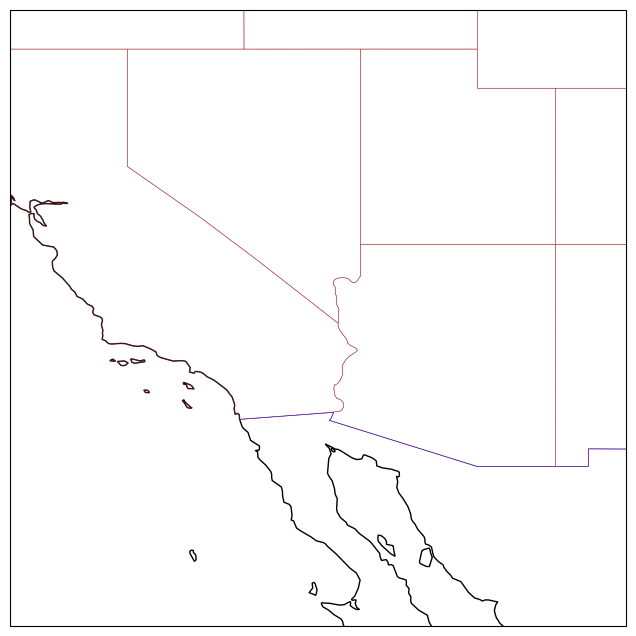

In [19]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs, feature as cfeature

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=-75))
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')
ax.set_extent([-107.25, -123, 27.25, 43])

In [20]:
u_pred = np.concatenate([pred_state_rk[i][:,:,:,3:4] for i in range(12)], axis = -1)
u_pred_denorm = denormalization(u_pred, value_range[0][0], value_range[1][0])
v_pred = np.concatenate([pred_state_rk[i][:,:,:,4:5] for i in range(12)], axis = -1)
v_pred_denorm = denormalization(v_pred, value_range[0][1], value_range[1][1])
vel_pred = np.sqrt(u_pred_denorm**2 + v_pred_denorm**2)
min_val = np.amin(np.sqrt(vel_seq_out_test[case_idx:case_idx + 16,:,:,0]**2 + vel_seq_out_test[case_idx:case_idx + 16,:,:,1]**2))
max_val = np.amax(np.sqrt(vel_seq_out_test[case_idx:case_idx + 16,:,:,0]**2 + vel_seq_out_test[case_idx:case_idx + 16,:,:,1]**2))


47.43889
-56.012146
59.83487
-48.16513


[ 6. 12. 18. 24. 30. 36. 42. 48. 54. 60. 66. 72. 78. 84. 90. 96.]


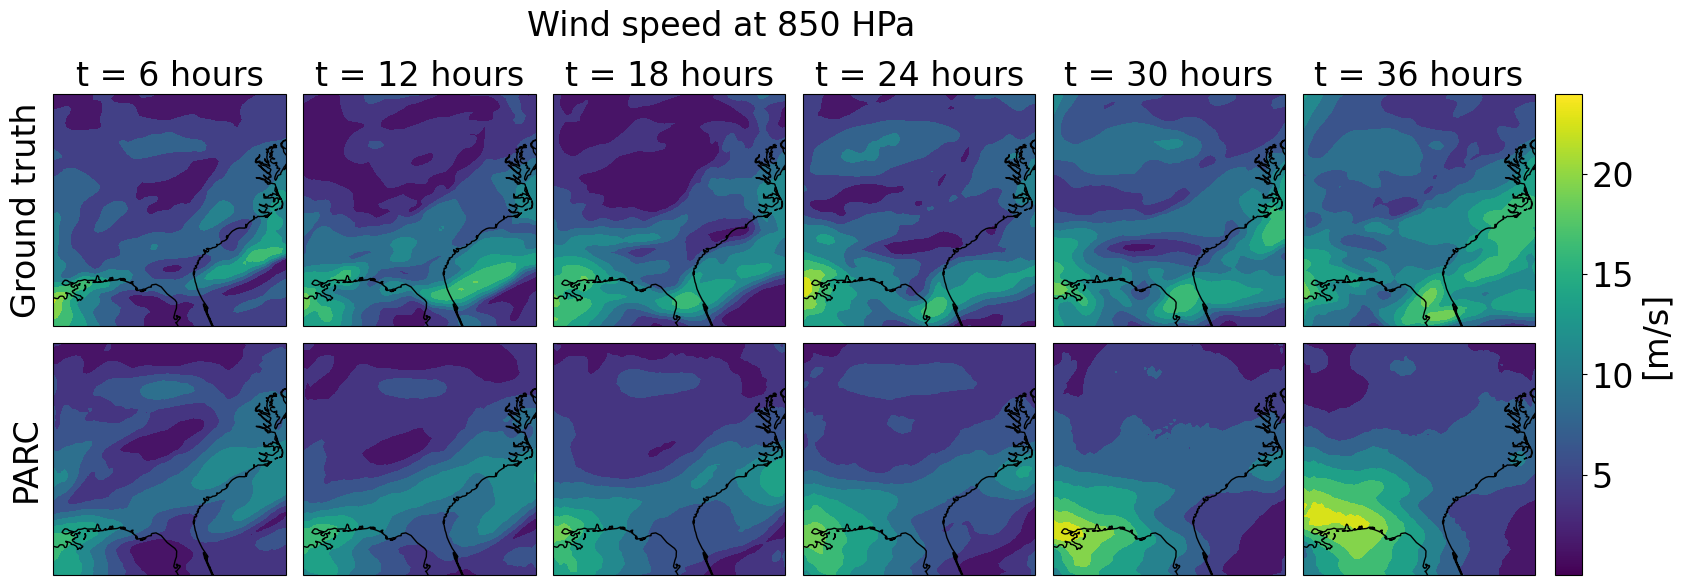

In [22]:
# plot the prediction results
import matplotlib as mpl
x_num = np.linspace(6, 96, 16)  # discrete timesteps
print(x_num)
fig, ax = plt.subplots(2,6,subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(18, 6.5))   
plt.subplots_adjust(wspace=0.06, hspace=0.07, top=0.85)
fig.suptitle("Wind speed at 850 HPa ", fontsize=24)
for i in range(6):
    ax[0][i].clear()
    ax[0][i].clear()
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    im = ax[0][i].contourf(lon,lat,np.sqrt(vel_seq_out_test[case_idx+i,:,:,0]**2 + vel_seq_out_test[case_idx+i,:,:,1]**2),
               transform = ccrs.PlateCarree(),
               cmap='viridis',
               vmin = min_val, vmax = max_val)
    ax[0][i].coastlines()

    ax[0][i].set_title(("t = " + "%d" % (x_num[i])+ " hours"), fontsize=24)

    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])
    ax[1][i].contourf(lon,lat,vel_pred[0,:,:,i],
               transform = ccrs.PlateCarree(),
               cmap='viridis',
              vmin = min_val, vmax = max_val)
    ax[1][i].coastlines()

ax[0][0].set_ylabel("Ground truth", fontsize=24)
ax[1][0].set_ylabel("PARC", fontsize=24)
fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.96, 0.110, 0.015, 0.740])
norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
cbar = fig.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap="viridis"), cax=cbar_ax, ax=im
)
cbar.set_label(label='[m/s]', fontsize=24)
cbar.ax.tick_params(labelsize=24)
plt.show()

In [23]:
temp_pred = np.concatenate([pred_state_rk[i][:,:,:,0:1] for i in range(12)], axis = -1)
print(u_pred.shape)
temp_pred_denorm = denormalization(temp_pred, value_range[2][0], value_range[3][0])
min_val = np.amin(state_seq_out_test[case_idx:case_idx+16,:,:,0])
max_val = np.amax(state_seq_out_test[case_idx:case_idx+16,:,:,0])

(1, 64, 64, 12)
312.21265
233.2951


[ 6. 12. 18. 24. 30. 36. 42. 48. 54. 60. 66. 72. 78. 84. 90. 96.]


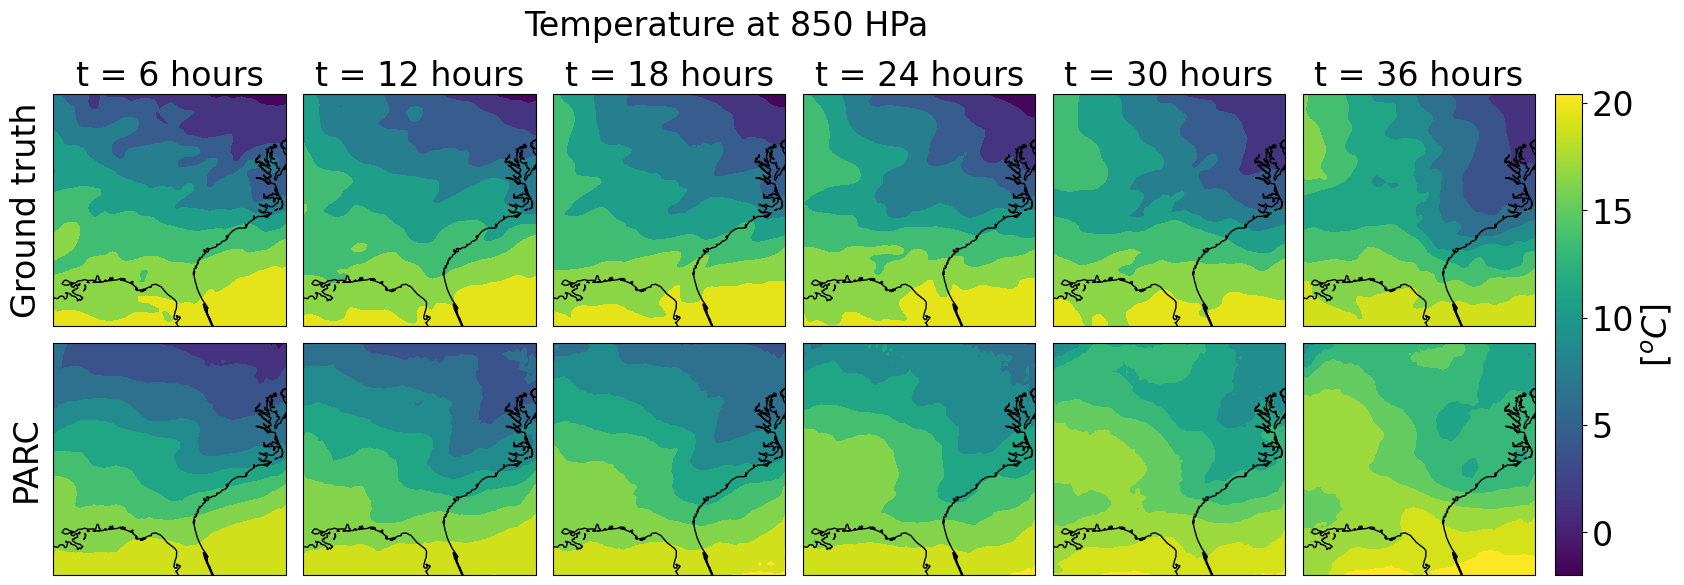

In [24]:
# plot the prediction results
x_num = np.linspace(6, 96, 16)  # discrete timesteps
print(x_num)
fig, ax = plt.subplots(2,6,subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(18, 6.5))   
plt.subplots_adjust(wspace=0.06, hspace=0.07, top=0.85)
fig.suptitle("Temperature at 850 HPa", fontsize=24)
for i in range(6):
    ax[0][i].clear()
    ax[0][i].clear()
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    im = ax[0][i].contourf(lon,lat,state_seq_out_test[case_idx+i,:,:,0]-273,
               transform = ccrs.PlateCarree(),
               cmap='viridis',
               vmin =  min_val-273, vmax =  max_val-273)
    ax[0][i].coastlines()

    ax[0][i].set_title(("t = " + "%d" % (x_num[i])+ " hours"), fontsize=24)

    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])
    ax[1][i].contourf(lon,lat,temp_pred_denorm[0,:,:,i]-273,
               transform = ccrs.PlateCarree(),
               cmap='viridis',
               vmin =  min_val-273, vmax =  max_val-273)
    ax[1][i].coastlines()

ax[0][0].set_ylabel("Ground truth", fontsize=24)
ax[1][0].set_ylabel("PARC", fontsize=24)
fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.96, 0.110, 0.015, 0.740])
norm = mpl.colors.Normalize(vmin =  min_val-273, vmax =  max_val-273)
cbar = fig.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap="viridis"), cax=cbar_ax, ax=im
)
cbar.set_label(label='$[^oC]$', weight="bold", fontsize=24)
cbar.ax.tick_params(labelsize=24)
plt.show()

In [25]:
geopotential_pred = np.concatenate([pred_state_rk[i][:,:,:,1:2] for i in range(12)], axis = -1)
print(u_pred.shape)
geopotential_pred_denorm = denormalization(geopotential_pred, value_range[2][1], value_range[3][1])
min_val = np.amin(state_seq_out_test[case_idx:case_idx+16,:,:,1])
max_val = np.amax(state_seq_out_test[case_idx:case_idx+16,:,:,1])

(1, 64, 64, 12)
16600.383
9476.984


[ 6. 12. 18. 24. 30. 36. 42. 48. 54. 60. 66. 72. 78. 84. 90. 96.]


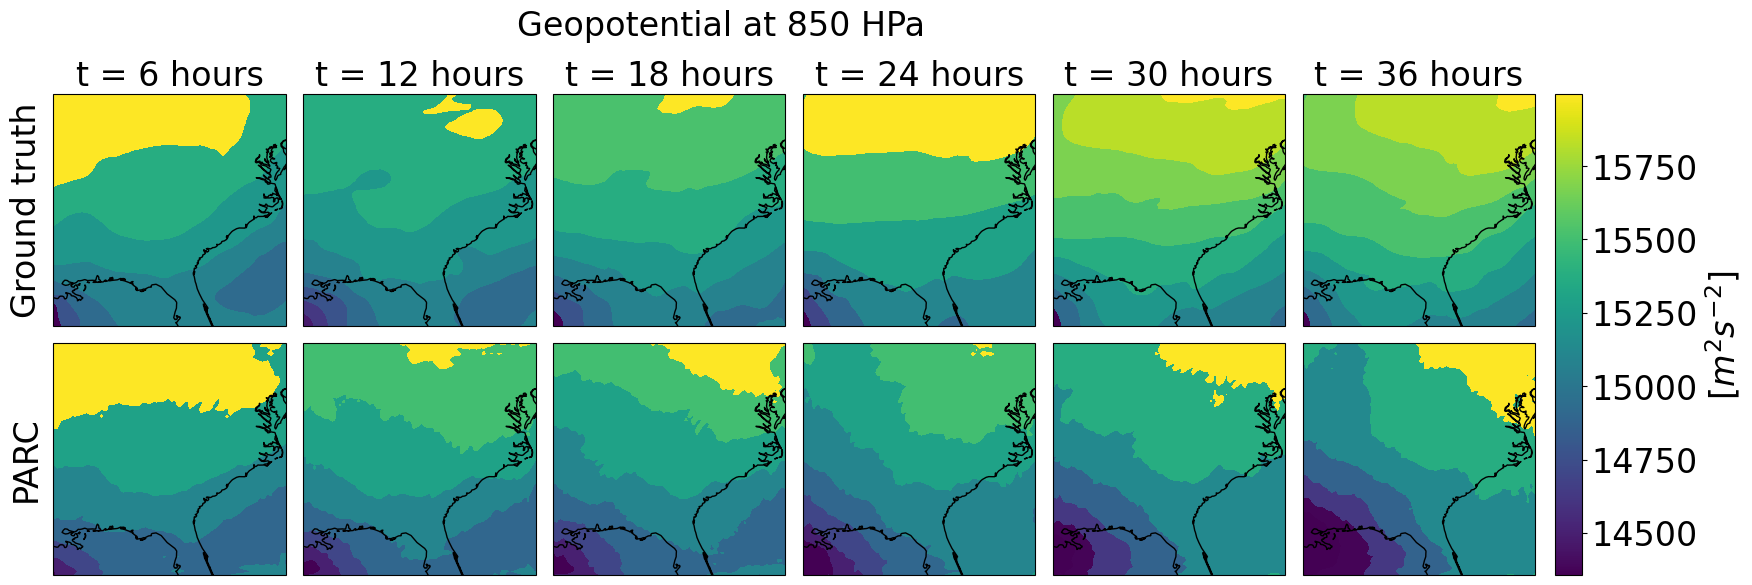

In [26]:
# plot the prediction results
x_num = np.linspace(6, 96, 16)  # discrete timesteps
print(x_num)
fig, ax = plt.subplots(2,6,subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(18, 6.5))   
plt.subplots_adjust(wspace=0.06, hspace=0.07, top=0.85)
fig.suptitle("Geopotential at 850 HPa ", fontsize=24)
for i in range(6):
    ax[0][i].clear()
    ax[0][i].clear()
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    im = ax[0][i].contourf(lon,lat,state_seq_out_test[case_idx+i,:,:,1],
               transform = ccrs.PlateCarree(),
               cmap='viridis',extend='both',
               vmin = min_val, vmax = max_val)
    ax[0][i].coastlines()

    ax[0][i].set_title(("t = " + "%d" % (x_num[i])+ " hours"), fontsize=24)

    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])
    ax[1][i].contourf(lon,lat,geopotential_pred_denorm[0,:,:,i],
               transform = ccrs.PlateCarree(),
               cmap='viridis',extend='both',
              vmin = min_val, vmax = max_val)
    ax[1][i].coastlines()

ax[0][0].set_ylabel("Ground truth", fontsize=24)
ax[1][0].set_ylabel("PARC", fontsize=24)
fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.96, 0.110, 0.015, 0.740])
norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
cbar = fig.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap="viridis"), cax=cbar_ax, ax=im
)
cbar.set_label(label='$[m^2s^{−2}]$' , weight="bold", fontsize=24)
cbar.ax.tick_params(labelsize=24)
plt.show()

In [27]:
relative_humidity = np.concatenate([pred_state_rk[i][:,:,:,2:3] for i in range(12)], axis = -1)
print(u_pred.shape)
relative_humidity_denorm = denormalization(relative_humidity, value_range[2][2], value_range[3][2])
min_val = np.amin(state_seq_out_test[case_idx:case_idx+16,:,:,2])
max_val = np.amax(state_seq_out_test[case_idx:case_idx+16,:,:,2])

(1, 64, 64, 12)
191.30891
-10.440716


[ 6. 12. 18. 24. 30. 36. 42. 48. 54. 60. 66. 72. 78. 84. 90. 96.]


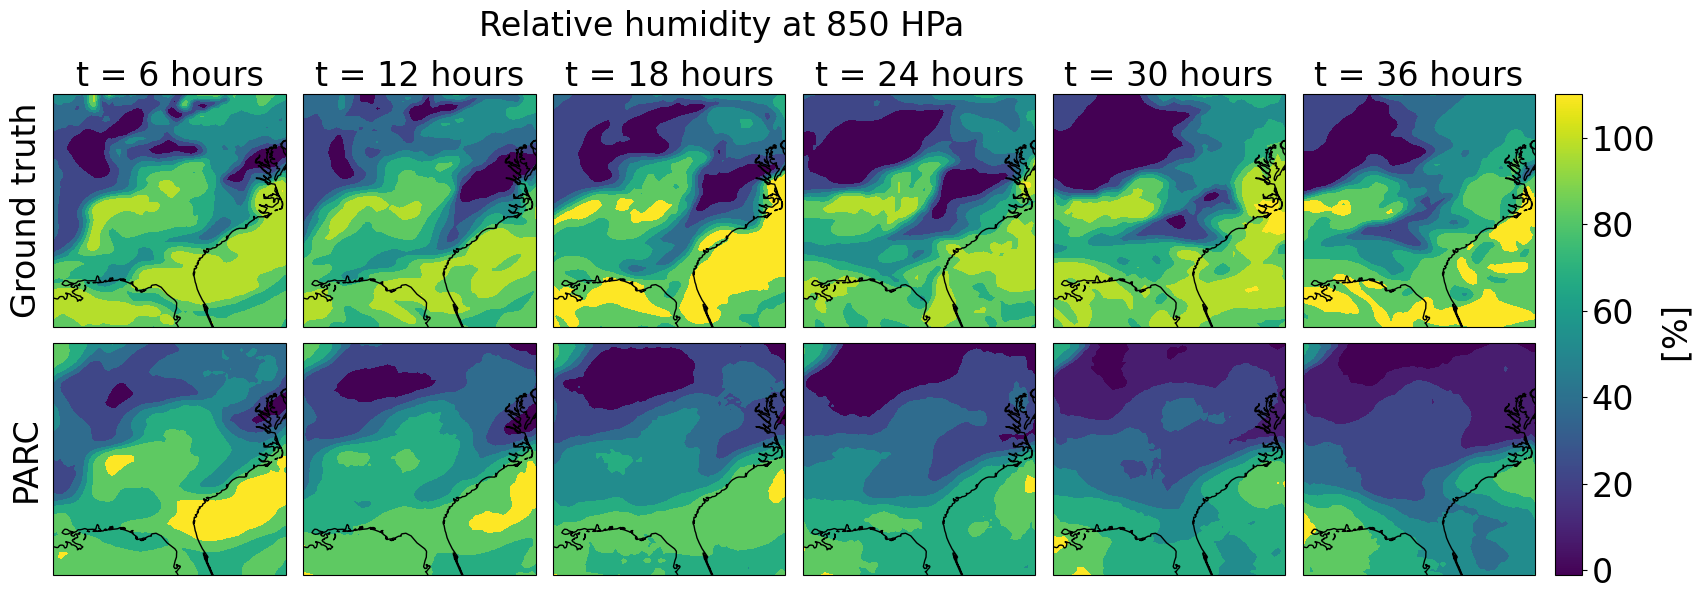

In [28]:
# plot the prediction results
x_num = np.linspace(6, 96, 16)  # discrete timesteps
print(x_num)
fig, ax = plt.subplots(2,6,subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(18, 6.5))   
plt.subplots_adjust(wspace=0.06, hspace=0.07, top=0.85)
fig.suptitle("Relative humidity at 850 HPa ", fontsize=24)
for i in range(6):
    ax[0][i].clear()
    ax[0][i].clear()
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    im = ax[0][i].contourf(lon,lat,state_seq_out_test[case_idx+i,:,:,2],
               transform = ccrs.PlateCarree(),
               cmap='viridis',extend='both',
               vmin = min_val, vmax = max_val)
    ax[0][i].coastlines()

    ax[0][i].set_title(("t = " + "%d" % (x_num[i])+ " hours"), fontsize=24)

    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])
    ax[1][i].contourf(lon,lat,relative_humidity_denorm[0,:,:,i],
               transform = ccrs.PlateCarree(),
               cmap='viridis',extend='both',
              vmin = min_val, vmax = max_val)
    ax[1][i].coastlines()

ax[0][0].set_ylabel("Ground truth", fontsize=24)
ax[1][0].set_ylabel("PARC", fontsize=24)
fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.96, 0.110, 0.015, 0.740])
norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
cbar = fig.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap="viridis"), cax=cbar_ax, ax=im
)
cbar.set_label(label='$[\%]$', weight="bold", fontsize=24)
cbar.ax.tick_params(labelsize=24)
plt.show()

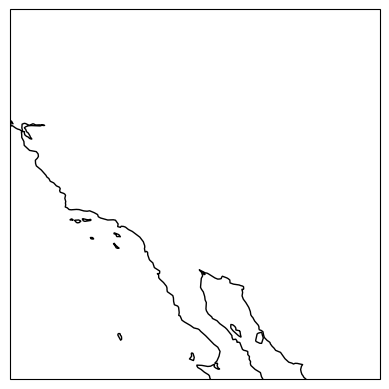

In [17]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-107.25, -123, 27.25, 43])
plt.show()

In [222]:
import matplotlib as mpl

def plot_field_evolution(y_pred, y_true, state_var_type="temperature"):
    """Visualize the prediction
    :param y_pred:          (numpy) predicted fields
                            [0, ...] predicted fields (F)
                            [1, ...] predicted change of fields (F_dot)
    :param y_true:          (numpy) true label of the fields
    :param test_sample_no:  (int)   array index to select the test case
    :state_var_type:        (str)   indicate which fields to plot the result to apply correct scaling
    """

    # get correct scaling terms
    if state_var_type == "temperature":
        opts = 0
        opts_2 = 0
        step = 6
        min_val = 300  # min temperature (K)
        max_val = 5000  # max temperature (K)
        unit = "(K)"
    elif state_var_type == "pressure":
        opts = 1
        opts_2 = 1
        step = 6
        min_val = -2  # min pressure (GPa)
        max_val = 50  # max pressure (GPa)
        unit = "(GPa)"
    elif state_var_type == "vel_x":
        opts = 0
        opts_2 = 3
        step = 4
        min_val = -1739.868  # min vel (m/s)
        max_val = 9278.142  # max vel (m/s)
        unit = "(m/s)"
    elif state_var_type == "vel_y":
        opts = 1
        opts_2 = 4
        step = 4
        min_val = -4335.711  # min vel (m/s)
        max_val = 5491.27  # max vel (m/s)
        unit = "(m/s)"
    else:
        print(
            state_var_type,
            " is not supported. Choose either 'temperature' or 'pressure'.",
        )
        return None
    fig, ax = plt.subplots(1,2,subplot_kw={'projection': ccrs.PlateCarree()})   
#     ax[0].imshow(pred_state_rk[i][0,:,:,3],vmin = min_val, vmax = max_val)
#     ax[1].imshow(vel_seq_out_norm_test[case_idx+i,:,:,0],vmin = min_val, vmax = max_val)
    
    
    # plot the prediction results
    x_num = np.linspace(0.79, 15.01, 19)  # discrete timesteps
    fig, ax = plt.subplots(2, 7, figsize=(28, 6.5))
    plt.subplots_adjust(wspace=0.06, hspace=0.07, top=0.85)
    fig.suptitle("Velocity in y-direction field evolution ($P_s$ = 9.5 GPa) ", fontsize=24)
    for i in range(5):
        ax[0][i].clear()
        ax[0][i].clear()
        ax[0][i].set_xticks([])
        ax[0][i].set_yticks([])
        im = ax[0][i].contourf(lon,lat,vel_pred[0,:,:,i],
                   transform = ccrs.PlateCarree(),
                   cmap='coolwarm',extend='both',
                  vmin = 0, vmax = 15)
        ax[0][i].coastlines()

        ax[0][i].set_title(("t = " + "%d" % (x_num[i * 3]+1)), fontsize=24)

        ax[1][i].set_xticks([])
        ax[1][i].set_yticks([])
        ax[1][i].contourf(lon,lat,np.sqrt(vel_seq_out_test[case_idx+i,:,:,0]**2 + vel_seq_out_test[case_idx+i,:,:,1]**2),
                   transform = ccrs.PlateCarree(),
                   cmap='coolwarm',extend='both',
                   vmin = 0, vmax = 15)
        ax[1].coastlines()

    ax[0][0].set_ylabel("Ground truth", fontsize=24)
    ax[1][0].set_ylabel("PARC", fontsize=24)
    fig.subplots_adjust(right=0.95)
    cbar_ax = fig.add_axes([0.96, 0.125, 0.015, 0.705])
    norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
    cbar = fig.colorbar(
        mpl.cm.ScalarMappable(norm=norm, cmap="jet"), cax=cbar_ax, ax=im
    )
    cbar.set_label(label=unit, weight="bold", fontsize=24)
    cbar.ax.tick_params(labelsize=24)
    plt.show()

### Temperature

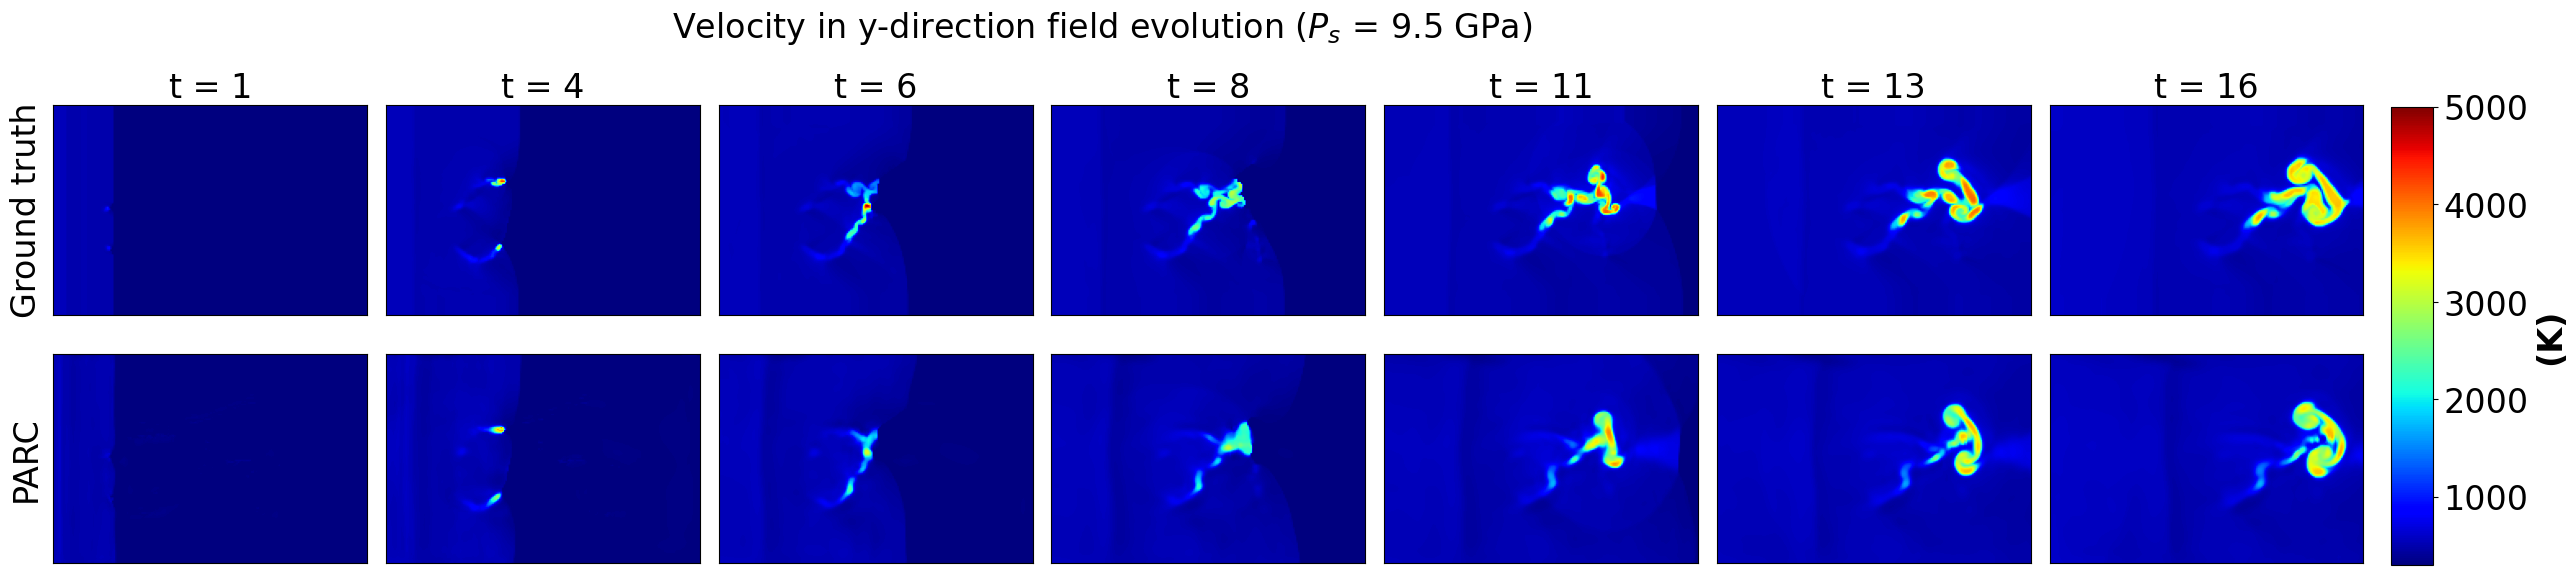

In [10]:
plot_field_evolution(pred_state_rk, state_seq_norm_test[case_idx:case_idx+1,:,:,3:], state_var_type="temperature")

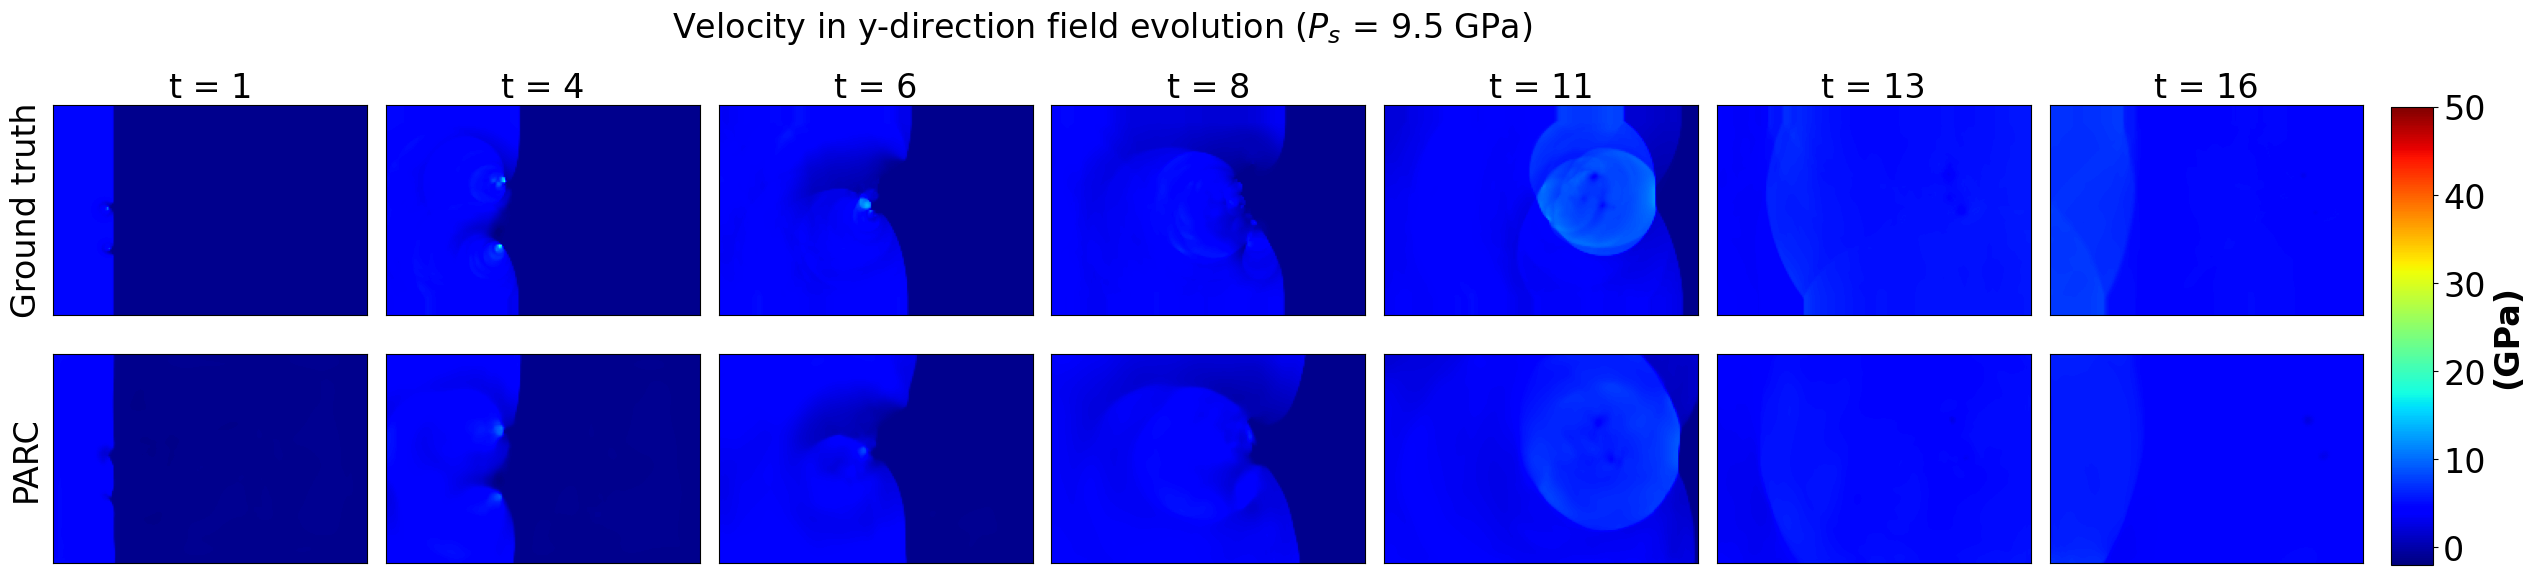

In [11]:
plot_field_evolution(pred_state_rk, state_seq_norm_test[case_idx:case_idx+1,:,:,3:], state_var_type="pressure")

### Pressure

In [12]:
plot_field_evolution(pred_state, state_seq_norm_test[case_idx:case_idx+1,:,:,3:], state_var_type="pressure")

NameError: name 'pred_state' is not defined

### Velocity in x direction

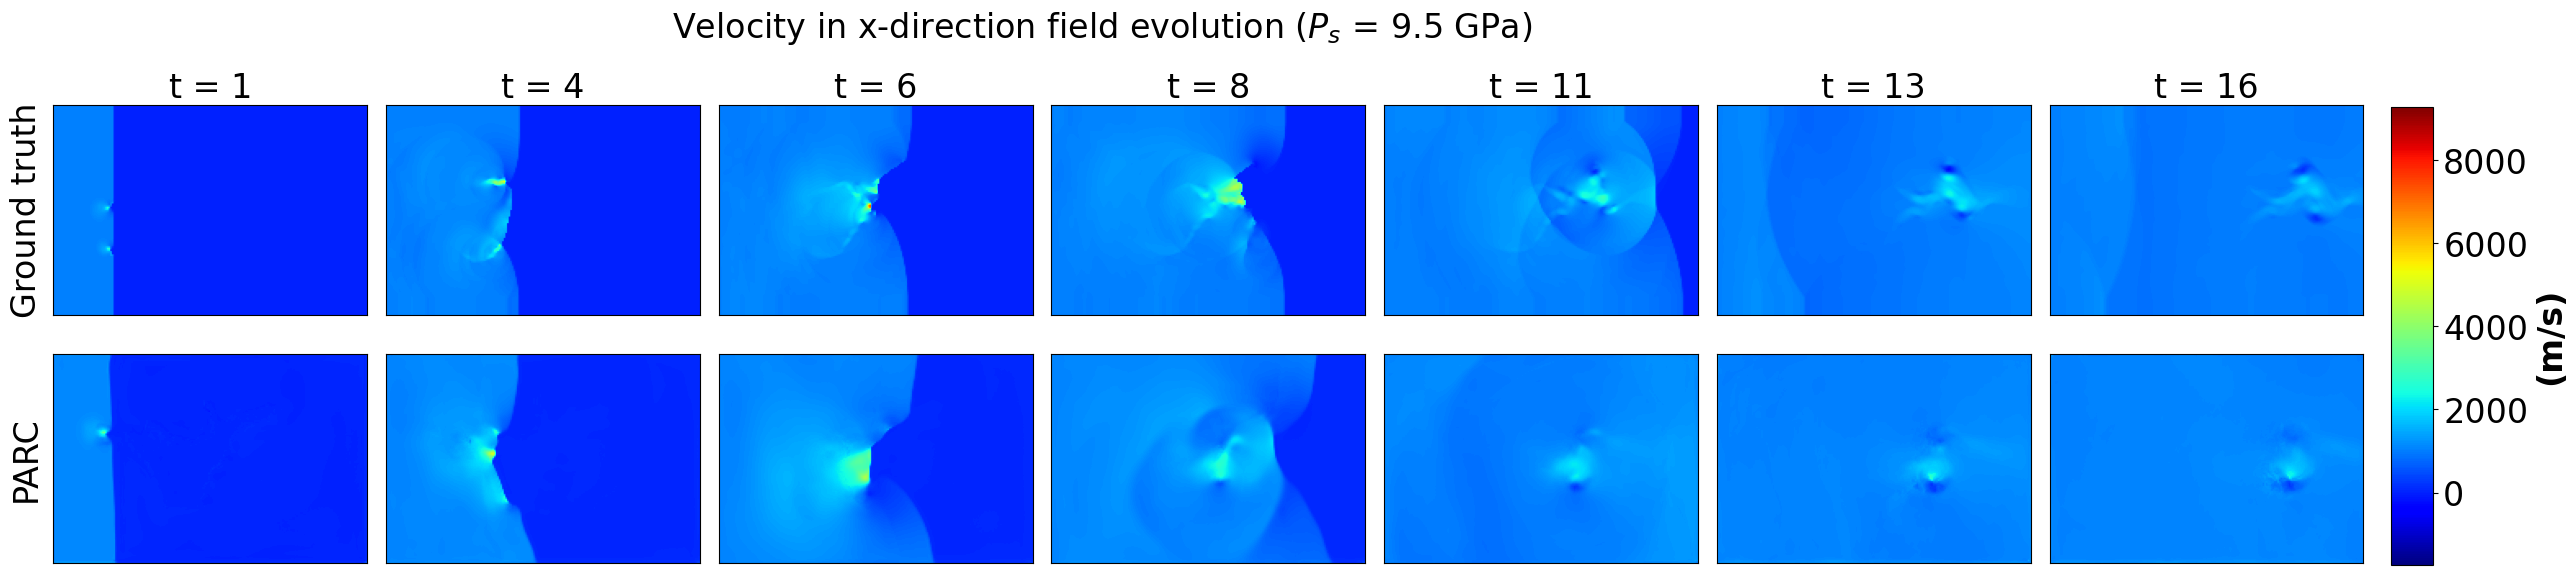

In [193]:
plot_field_evolution(pred_state, vel_seq_norm_test[case_idx:case_idx+1,:,:,2:], state_var_type="vel_x")

### Velocity in y direction

In [85]:
plot_field_evolution(pred_state, vel_seq_norm_test[case_idx:case_idx+1,:,:,2:], state_var_type="vel_y")

NameError: name 'pred_state' is not defined

In [14]:
Temp_gt = np.delete(state_seq_norm_test, outlier, 0)

Temp_gt = Temp_gt[:,:,:,3::3]    # Ground truth temperature field evolution
Temp_gt = misc.scale_temperature(temperatures = Temp_gt, start_ts = 0, max_temp = 5000, min_temp = 300)
Temp_pred_parc_rk = state_rk[:,:,:,0::5]   # PARC prediction temperature field evolution
Temp_pred_parc_rk = misc.scale_temperature(temperatures = Temp_pred_parc_rk, start_ts = 0, max_temp = 5000, min_temp = 300)


In [16]:
hs_field_gt = Temp_gt > 850
parc_hs_field = Temp_pred_parc_rk > 850

In [42]:
hs_field_gt.shape

(25, 128, 192, 17)

In [ ]:
for i in range(15):
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(np.squeeze(Temp_gt[21,:,:,i]))
    ax[1].imshow(np.squeeze(Temp_pred_parc_rk[21,:,:,i]))
    plt.show()

### Quantitative analysis

In [110]:
state_rk = []
outlier = [0, 3, 30, 31, 32, 33, 18, 19, 11]
# outlier = []
for idx in range(34):
    if idx not in outlier:
        print(idx)
        state_var_current = state_seq_norm_test[idx:idx+1,:,:,0:3]
        velocity_current = vel_seq_norm_test[idx:idx+1,:,:,0:2]
        pred_state = parc_rk.predict([state_var_current,velocity_current])
        pred_state_case = np.concatenate(pred_state, axis = -1)
        print(pred_state_case.shape)
        state_rk.append(pred_state_case)
state_rk = np.concatenate(state_rk, axis = 0)
print(state_rk.shape)       

1
1/1 [==============================] - 1s 740ms/step
(1, 128, 192, 75)
2
1/1 [==============================] - 1s 723ms/step
(1, 128, 192, 75)
4
1/1 [==============================] - 1s 725ms/step
(1, 128, 192, 75)
5
1/1 [==============================] - 1s 723ms/step
(1, 128, 192, 75)
6
1/1 [==============================] - 1s 723ms/step
(1, 128, 192, 75)
7
1/1 [==============================] - 1s 722ms/step
(1, 128, 192, 75)
8
1/1 [==============================] - 1s 722ms/step
(1, 128, 192, 75)
9
1/1 [==============================] - 1s 723ms/step
(1, 128, 192, 75)
10
1/1 [==============================] - 1s 723ms/step
(1, 128, 192, 75)
12
1/1 [==============================] - 1s 723ms/step
(1, 128, 192, 75)
13
1/1 [==============================] - 1s 722ms/step
(1, 128, 192, 75)
14
1/1 [==============================] - 1s 723ms/step
(1, 128, 192, 75)
15
1/1 [==============================] - 1s 724ms/step
(1, 128, 192, 75)
16
1/1 [==============================] - 1s 7

In [111]:
state_euler = []
outlier = [0, 3, 30, 31, 32, 33, 18, 19, 11]
# outlier = []
for idx in range(34):
    if idx not in outlier:
        print(idx)
        state_var_current = state_seq_norm_test[idx:idx+1,:,:,0:3]
        velocity_current = vel_seq_norm_test[idx:idx+1,:,:,0:2]
        pred_state = parc_euler.predict([state_var_current,velocity_current])
        pred_state_case = np.concatenate(pred_state, axis = -1)
        print(pred_state_case.shape)
        state_euler.append(pred_state_case)
state_euler = np.concatenate(state_euler, axis = 0)
print(state_euler.shape)       

1
1/1 [==============================] - 0s 284ms/step
(1, 128, 192, 75)
2
1/1 [==============================] - 0s 280ms/step
(1, 128, 192, 75)
4
1/1 [==============================] - 0s 281ms/step
(1, 128, 192, 75)
5
1/1 [==============================] - 0s 280ms/step
(1, 128, 192, 75)
6
1/1 [==============================] - 0s 280ms/step
(1, 128, 192, 75)
7
1/1 [==============================] - 0s 280ms/step
(1, 128, 192, 75)
8
1/1 [==============================] - 0s 280ms/step
(1, 128, 192, 75)
9
1/1 [==============================] - 0s 281ms/step
(1, 128, 192, 75)
10
1/1 [==============================] - 0s 280ms/step
(1, 128, 192, 75)
12
1/1 [==============================] - 0s 281ms/step
(1, 128, 192, 75)
13
1/1 [==============================] - 0s 280ms/step
(1, 128, 192, 75)
14
1/1 [==============================] - 0s 280ms/step
(1, 128, 192, 75)
15
1/1 [==============================] - 0s 281ms/step
(1, 128, 192, 75)
16
1/1 [==============================] - 0s 2

In [196]:
def plot_sensitivity(y_true, y_pred_euler, y_pred_rk, metric, ts):
    """sensitivity plot comparing true and prediction
    :param y_true:  (tuple)
    :param y_pred:  (tuple)
    :param metric:  (str)   metric for plotting. {hs_temp, hs_area, rate_hs_temp, rate_hs_area}
    """

    if metric == "hs_temp" or metric == "hs_area":
        ts = np.linspace(3.16, 15.01, ts)
    elif metric == "rate_hs_temp" or metric == "rate_hs_area":
        ts = np.linspace(3.16, 14.22, ts - 1)
    else:
        print(
            "Wrong metric selection. Possible metrics are: 'hs_temp', 'hs_area', 'rate_hs_temp', 'rate_hs_area"
        )

    col_true, col_pred, col_yel = "#277DA1", "#F94144", "#F9C74F"
    plt.figure(figsize=(13, 10))

    # mean values
    plt.plot(ts, y_true[0], color=col_true, lw=2.5, label="Ground truth")
    plt.plot(ts, y_pred_rk[0], color=col_pred, lw=2.5, label="PARC-RK4")
#     plt.plot(ts, y_pred_euler[0], color=col_yel, lw=2.5, label="PARC-Euler")

    # plot intervals
    plt.fill_between(ts, y_true[1], y_true[2], color=col_true, alpha=0.2)
    plt.fill_between(ts, y_pred_rk[1], y_pred_rk[2], color=col_pred, alpha=0.2)
#     plt.fill_between(ts, y_pred_euler[1], y_pred_euler[2], color=col_yel, alpha=0.2)

    # corresponding titles and wordings based on the metric
    if metric == "hs_temp":
        plt.title(r"Ave. Hotspot Temperature ($T_{hs}$)", fontsize=32, pad=15)
        plt.xlabel(r"t ($ns$)", fontsize=28)
        plt.ylabel(r" $T_{hs}$ ($K$)", fontsize=28)
        plt.axis([3.16, 15.01, 0, 5000])
    elif metric == "hs_area":
        plt.title(r"Hotspot Area ($A_{hs}$)", fontsize=32, pad=15)
        plt.xlabel(r"t ($ns$)", fontsize=28)
        plt.ylabel(r"$A_{hs}$ ", fontsize=28)
        plt.axis([3.16, 15.01, 0, 25])
    elif metric == "rate_hs_temp":
        plt.title(
            r"Ave. Hotspot Temperature Rate of Change ($\dot{T_{hs}}$)",
            fontsize=32,
            pad=15,
        )
        plt.xlabel(r"t ($ns$)", fontsize=28)
        plt.ylabel(r"$\dot{T_{hs}}$ ($K$/$ns$)", fontsize=28)
        plt.axis([3.16, 15.01, -30, 1200])
    else:
        plt.title(r"Hotspot Area Rate of Change ($\dot{A_{hs}}$)", fontsize=32, pad=15)
        plt.xlabel(r"t ($ns$)", fontsize=28)
        plt.ylabel(r"$\dot{A_{hs}}$", fontsize=28)
        plt.axis([3.16, 15.01, 0, 10])

    plt.xticks(fontsize=28)
    plt.yticks(fontsize=28)
    plt.legend(loc=2, fontsize=28)
    plt.show()


In [114]:
## Preprocess temperature data
# Get temperature field evolution
# Temp_gt = np.delete(state_seq_norm_test, outlier, 0)
# Temp_gt = Temp_gt[:,:,:,3::3]    # Ground truth temperature field evolution
Temp_gt = state_seq_norm_test[:,:,:,3::3]    # Ground truth temperature field evolution
# Temp_gt = np.clip(Temp_gt,0,1)
Temp_pred_parc_rk = state_rk[:,:,:,0::5]   # PARC prediction temperature field evolution
Temp_pred_parc_euler = state_euler[:,:,:,0::5]   # PARC prediction temperature field evolution

# # Denormalize temperature field evolution
Temp_gt = misc.scale_temperature(temperatures = Temp_gt, start_ts = 0, max_temp = 5000, min_temp = 300)
Temp_pred_parc_rk = misc.scale_temperature(temperatures = Temp_pred_parc_rk, start_ts = 0, max_temp = 5000, min_temp = 300)
Temp_pred_parc_euler = misc.scale_temperature(temperatures = Temp_pred_parc_euler, start_ts = 0, max_temp = 5000, min_temp = 300)

# Compute sensitivity of ground truth data
gt_hs_temp, gt_hs_area = metrics.calculate_hotspot_metric(Temp_gt[:,:,:,0:], cases_range = (0,25), n_timesteps = 15)
gt_rate_hs_temp,gt_rate_hs_area = metrics.calculate_hotspot_metric_rate_of_change(Temp_gt[:,:,:,0:], cases_range = (0,25), n_timesteps = 15)

# Compute sensitivity of PARC prediction
parc_hs_temp_rk, parc_hs_area_rk = metrics.calculate_hotspot_metric(Temp_pred_parc_rk[:,:,:,0:], cases_range = (0,25), n_timesteps =15)
parc_rate_hs_temp_rk, parc_rate_hs_area_rk = metrics.calculate_hotspot_metric_rate_of_change(Temp_pred_parc_rk[:,:,:,0:], cases_range = (0,25), n_timesteps = 15)

# Compute sensitivity of PARC prediction
parc_hs_temp_euler, parc_hs_area_euler = metrics.calculate_hotspot_metric(Temp_pred_parc_euler[:,:,:,0:], cases_range = (0,25), n_timesteps =15)
parc_rate_hs_temp_euler, parc_rate_hs_area_euler = metrics.calculate_hotspot_metric_rate_of_change(Temp_pred_parc_euler[:,:,:,0:], cases_range = (0,25), n_timesteps = 15)

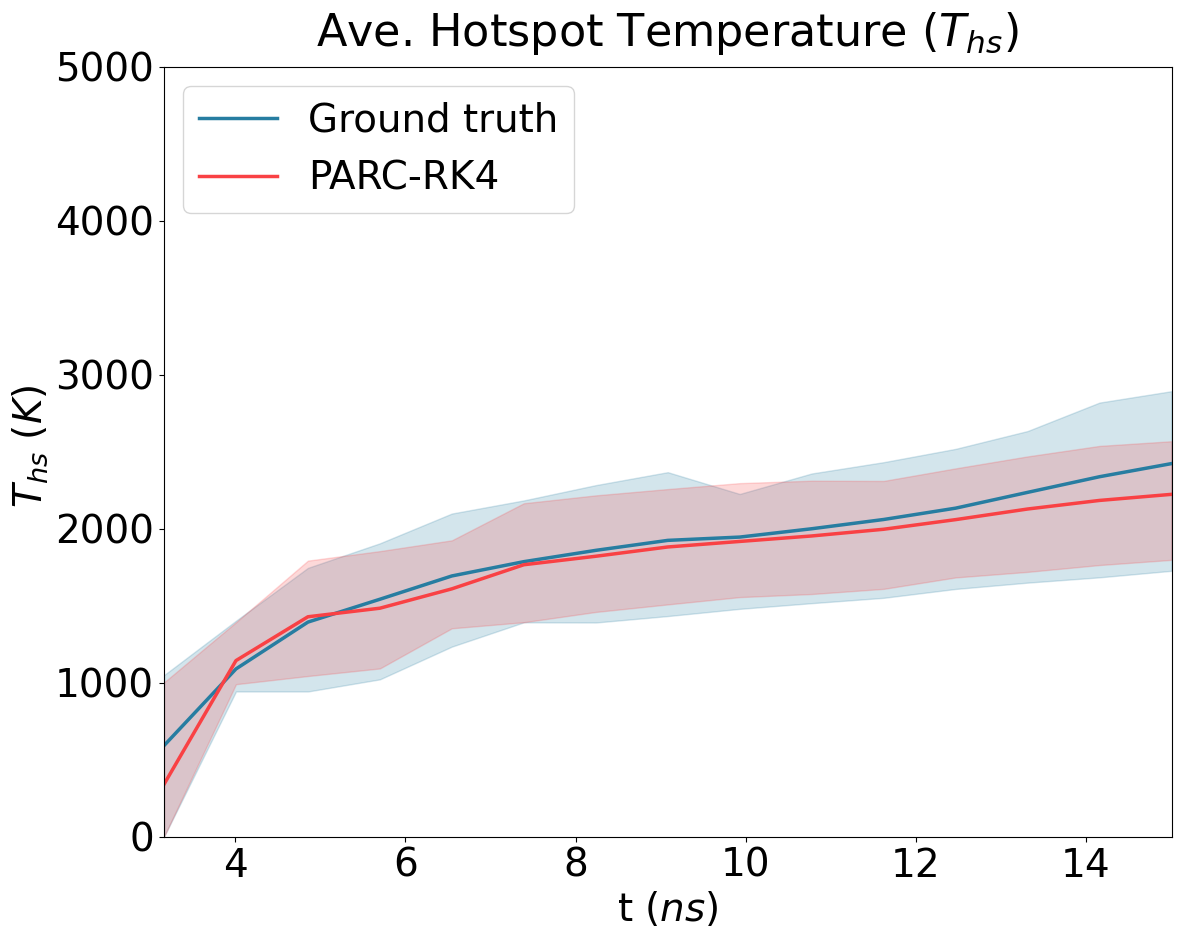

In [197]:
plot_sensitivity(y_true=gt_hs_temp, y_pred_rk=parc_hs_temp_rk, y_pred_euler = parc_hs_temp_euler,  metric='hs_temp',ts=15)

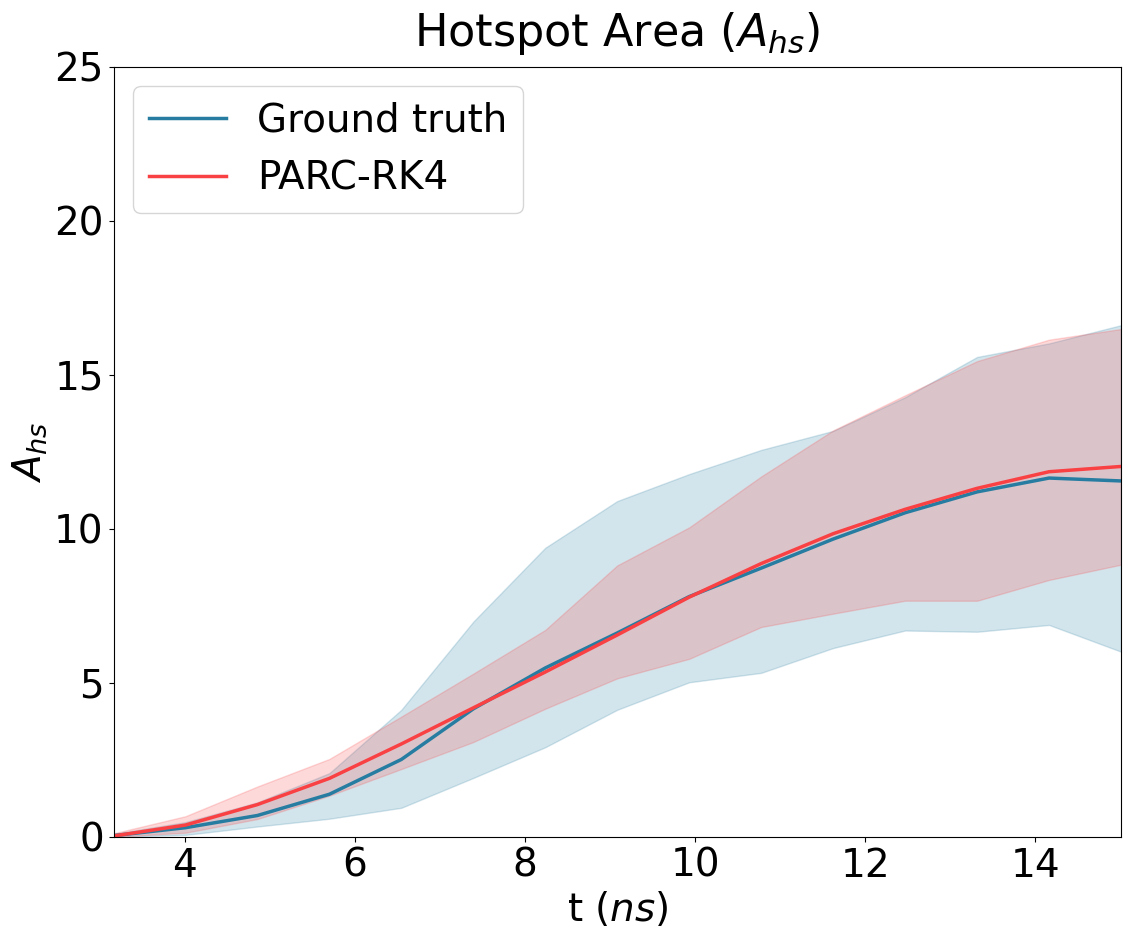

In [198]:
plot_sensitivity(y_true=gt_hs_area, y_pred_rk=parc_hs_area_rk, y_pred_euler = parc_hs_area_euler, metric='hs_area',ts=15)

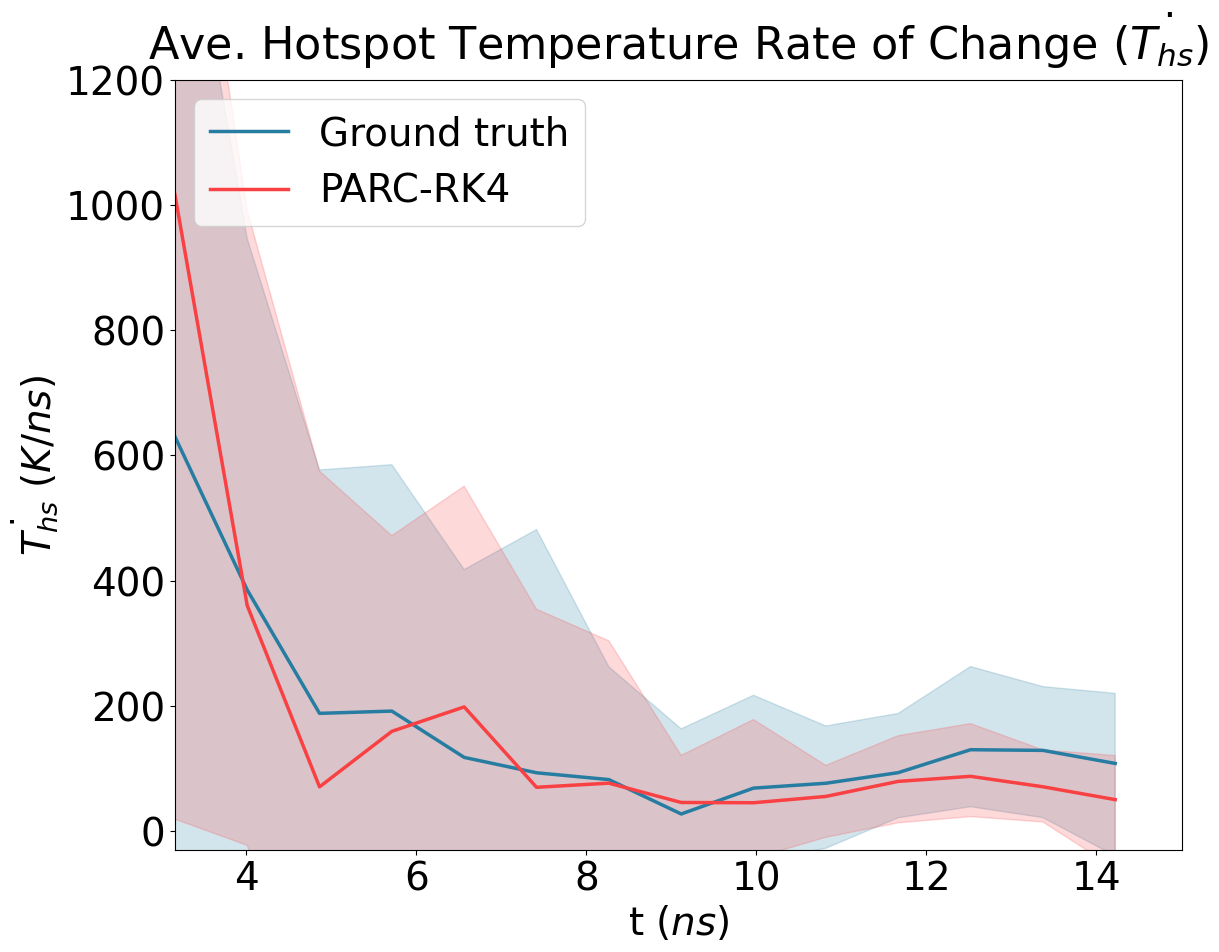

In [199]:
plot_sensitivity(y_true=gt_rate_hs_temp, y_pred_rk=parc_rate_hs_temp_rk, y_pred_euler = parc_rate_hs_temp_euler, metric='rate_hs_temp',ts=15)

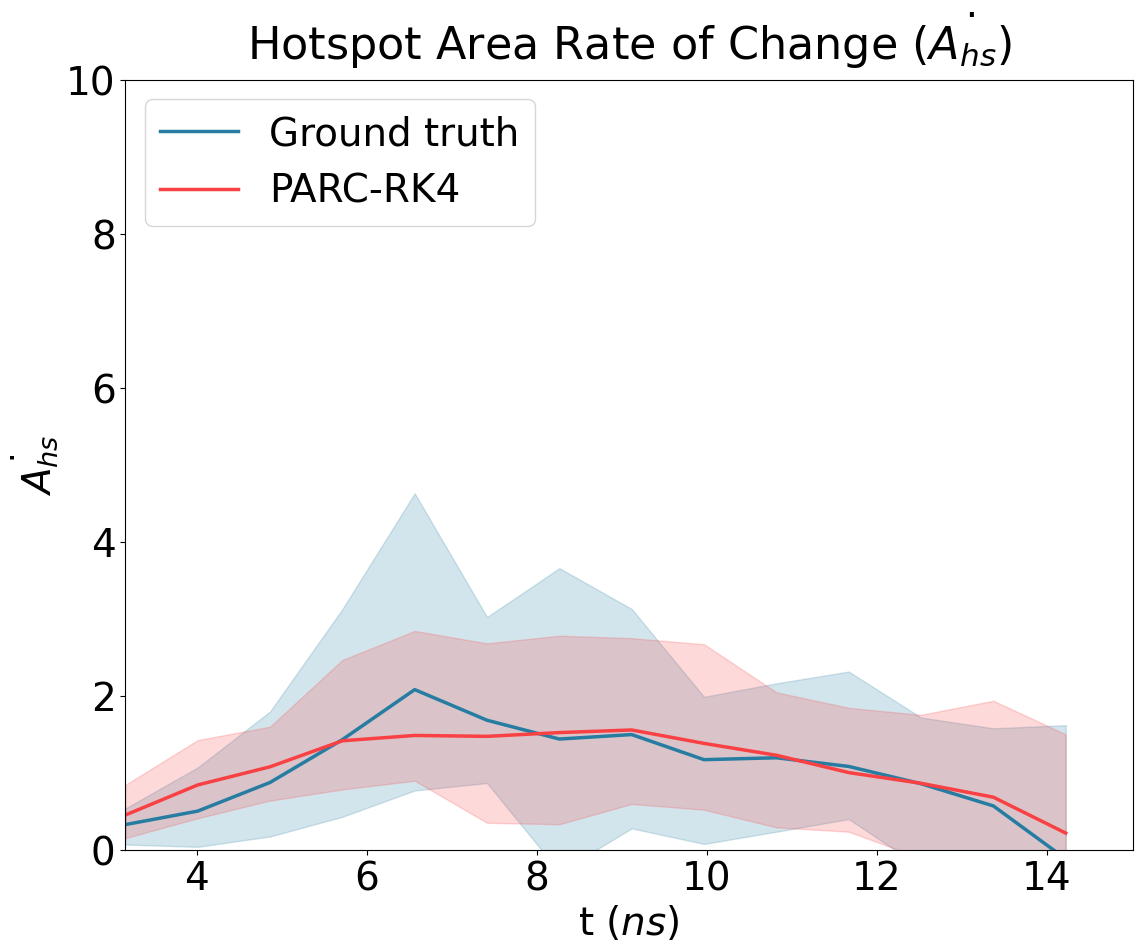

In [200]:
plot_sensitivity(y_true=gt_rate_hs_area, y_pred_rk=parc_rate_hs_area_rk, y_pred_euler = parc_rate_hs_area_euler, metric='rate_hs_area',ts=15)

In [202]:
## Preprocess temperature data
# Get temperature field evolution
# Temp_gt = np.delete(state_seq_norm_test, outlier, 0)
# Temp_gt = Temp_gt[:,:,:,3::3]    # Ground truth temperature field evolution
P_gt = vel_seq_norm_test[:,:,:,4::3]    # Ground truth temperature field evolution
# Temp_gt = np.clip(Temp_gt,0,1)
P_pred_parc_rk = state_rk[:,:,:,1::5]   # PARC prediction temperature field evolution
Temp_pred_parc_euler = state_euler[:,:,:,0::5]   # PARC prediction temperature field evolution

# # Denormalize temperature field evolution
Temp_gt = misc.scale_temperature(temperatures = Temp_gt, start_ts = 0, max_temp = 50e9, min_temp = -2e9)
Temp_pred_parc_rk = misc.scale_temperature(temperatures = Temp_pred_parc_rk, start_ts = 0, max_temp = 50e9, min_temp = -2e9)
Temp_pred_parc_euler = misc.scale_temperature(temperatures = Temp_pred_parc_euler, start_ts = 0, max_temp = 5000, min_temp = 300)

In [ ]:
plot_sensitivity(y_true=gt_rate_hs_area, y_pred_rk=parc_rate_hs_area_rk, y_pred_euler = parc_rate_hs_area_euler, metric='rate_hs_area',ts=15)

In [ ]:
    if state_var_type == "temperature":
        opts = 0
        opts_2 = 0
        step = 6
        min_val = 300  # min temperature (K)
        max_val = 5000  # max temperature (K)
        unit = "(K)"
    elif state_var_type == "pressure":
        opts = 1
        opts_2 = 1
        step = 6
        min_val = -2  # min pressure (GPa)
        max_val = 50  # max pressure (GPa)
        unit = "(GPa)"
    elif state_var_type == "vel_x":
        opts = 0
        opts_2 = 3
        step = 4
        min_val = -1739.868  # min vel (m/s)
        max_val = 9278.142  # max vel (m/s)
        unit = "(m/s)"
    elif state_var_type == "vel_y":
        opts = 1
        opts_2 = 4
        step = 4
        min_val = -4335.711  # min vel (m/s)
        max_val = 5491.27  # max vel (m/s)
        unit = "(m/s)"